In [1]:
import numpy as np
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
import scipy
from scipy import signal

data = np.load('experiment_data.npy')

<IPython.core.display.Javascript object>


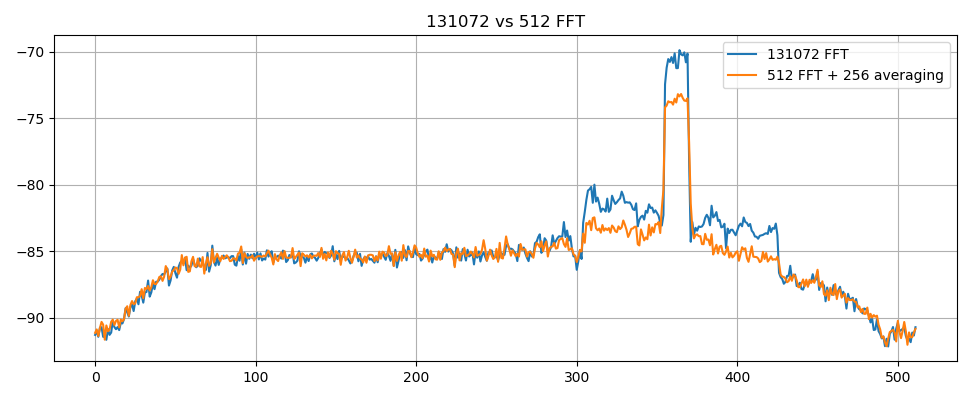

In [12]:
plt.figure(figsize=(9.75, 4))

# 131k FFT
FFT_SIZE = 131072
dbs = np.log10(np.abs(np.fft.fftshift(np.fft.fft(data, FFT_SIZE)/FFT_SIZE))) * 20
resampled = scipy.signal.resample(dbs, 512) # Resample to 512 points, so that both lines can be plotted!
plt.plot(resampled, label='131072 FFT')

# 512 FFT + 256 averaging
FFT_SIZE = 512
data512 = data.reshape((256, FFT_SIZE))

compensate_db = np.log2(256) * 3 # 24 db
dbs = np.log10(np.abs(np.fft.fftshift(np.fft.fft(data512, FFT_SIZE) / FFT_SIZE))) * 20 - compensate_db
dbs_avg = np.mean(dbs, axis=0)
plt.plot(dbs_avg, label='512 FFT + 256 averaging')

plt.title('131072 vs 512 FFT')
plt.tight_layout()
plt.legend()
plt.grid()
plt.show()
